东西地段的平均房价为596.0万元
南北地段的平均房价为621.0万元
南西地段的平均房价为605.0万元
南地段的平均房价为500.0万元
东北地段的平均房价为621.0万元
西地段的平均房价为511.0万元
西南地段的平均房价为671.0万元
东地段的平均房价为500.0万元
西北地段的平均房价为598.0万元
北地段的平均房价为422.0万元
东南地段的平均房价为695.0万元
东西北地段的平均房价为654.0万元
东南北地段的平均房价为801.0万元
南西北地段的平均房价为822.0万元
西南北地段的平均房价为818.0万元
东南西地段的平均房价为861.0万元
房子价格的最大值是6000.00万元
房子价格的最小值是60.00万元
房子价格的极差是5940.00万元
房子价格的平均值是610.67万元
房子价格的中位数是499.00万元
房子价格的四分位数分别是365.00万元,499.00万元,717.50万元
房子价格的方差是169285.69
房子价格的峰度是18.75
房子价格的偏度是3.05
平均每平米的房子价格是6.16万元
卖出房子最多规模大小的是89平米
最受欢迎的房子布局是2室1厅


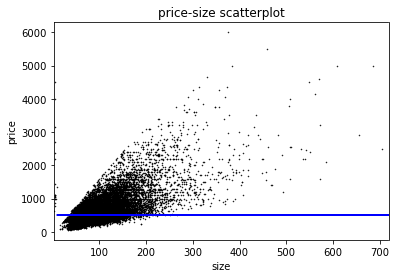

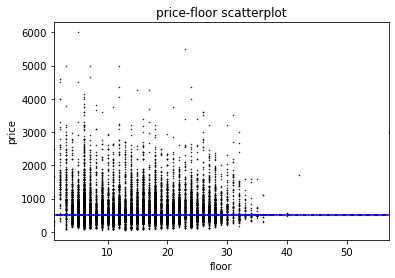

In [1]:
import math

def ranged(l):
    return max(l)-min(l)


def avg(l):
    return float(sum(l))/len(l)


def median(l):
    l = sorted(l)
    if len(l)%2 == 1:
        return l[len(l)//2]
    else:
        return (l[len(1)//2-1]+l[len(l)//2])/2.0

    
def mode(l):
    dic = {}
    lst = []
    sum = None
    for each in l:
        dic[each] = dic.get(each,0)+1
    if len(set(dic.values()))==1:
        return '没有众数'
    else:
        a = [k for (k,v) in dic.items() if v == max(dic.values())]
    return a[0]


def variance(l):
    average = float(sum(l))/len(l)
    s = 0
    for each in l:
        s += (float(each)-average)**2
    return s/len(l)


def quartile(l):
    l = sorted(l)
    q1 = None
    q2 = None
    q3 = None
    if len(l)%2 == 1:
        q2 = l[int(len(l)//2)]
        r1 = l[:int(len(l)//2+1)]
        r2 = l[int(len(l)//2+1):]
        q1 = (r1[int(len(r1)//2-1)]+r1[int(len(r1)//2)])/2.0
        q3 = (r2[int(len(r2)//2-1)]+r2[int(len(r2)//2)])/2.0
    else:
        q2 = (l[int(len(l)//2-1)]+l[int(len(l)//2)])/2.0
        if len(l)%4 == 0:
            r1 = l[:int(len(l)/2)]
            r2 = l[int(len(l)/2):]
            q1 = (r1[int(len(r1)//2-1)]+r1[int(len(r1)//2)])/2.0
            q3 = (r2[int(len(r2)//2-1)]+r2[int(len(r2)//2)])/2.0
        else:
            q1 = l[int(len(l)//4)]
            q3 = l[int(len(l)*3//4)]
    return q1,q2,q3


def skew(l):
    avg = 0.0
    avg2 = 0.0
    avg3 = 0.0
    for each in l:
        avg += each
        avg2 += each**2
        avg3 += each**3
    avg /= len(l) #期望
    avg2 /= len(l)
    avg3 /= len(l) #E(x^3)
    sigma = math.sqrt(avg2-avg*avg) #标准差
    skew = (avg3-3*avg*sigma**2-avg**3)/(sigma**3)
    return skew


def kurt(l):
    avg = 0.0
    avg2 = 0.0
    avg4 = 0.0
    for each in l:
        avg += each
        avg2 += each**2
    avg /= len(l) #期望
    avg2 /= len(l)
    sigma = math.sqrt(avg2-avg*avg) #标准差
    for a in l:
        a -= avg
        avg4 += a**4
    avg4 /= len(l)
    kurt = avg4/(sigma**4)
    return kurt


import matplotlib.pyplot as plt
import numpy as np


def price_size_scatter(n,s,x1,y1):
    #分别为点的数量和大小
    #x1 = sizelist
    #y1 = pricelist
    x2 = np.random.uniform(min(x1),max(x1),n)
    y2 = np.array([median(y1)]*n)
    fig = plt.figure()
    ax1 = fig.add_subplot(1,1,1)
    ax1.set_title('price-size scatterplot')
    ax1.set_xlabel('size')
    ax1.set_ylabel('price')
    ax1.scatter(x1,y1,s=s,c='k',marker = '.')
    ax1.plot(x2,y2,c='b',ls='--')
    plt.xlim(xmax = max(x1)-300,xmin = min(x1))
    plt.show()

    
def price_floor_scatter(n,s,x1,y1):
    #分别为点的数量和大小
    #x1 = floorlist
    #y1 = pricelist
    x2 = np.random.uniform(max(x1),min(x1),n)
    y2 = np.array([median(y1)]*n)
    fig = plt.figure()
    ax1 = fig.add_subplot(1,1,1)
    ax1.set_title('price-floor scatterplot')
    ax1.set_xlabel('floor')
    ax1.set_ylabel('price')
    ax1.scatter(x1,y1,s=s,c='k',marker = '.')
    ax1.plot(x2,y2,c='b',ls='--')
    plt.xlim(xmax = max(x1),xmin = min(x1))
    plt.show()

    
#打开文件，并将内容存储在列表中
f = open('lj.csv','r')
lst = []
sizelist = []
pricelist = []
layoutlist = []
floorlist = []
directionlist = []
layoutdict = {}
directiondict = {}
total = 0
num = 0
for eachline in f.readlines():
    if eachline.strip().replace(',','') is not '':
        lst.append(eachline.strip().split(','))
a,b =lst[0],lst[1:]

#提前定义变量
size_index = a.index('Size')
price_index = a.index('Price')
layout_index = a.index('Layout')
floor_index = a.index('Floor')
direction_index = a.index('Direction')
for each in b:
    sizelist.append(float(each[size_index]))
    pricelist.append(float(each[price_index]))
    layoutlist.append(each[layout_index])
    floorlist.append(float(each[floor_index]))
    directionlist.append(each[direction_index])
for each_layout in layoutlist:
    layoutdict[each_layout]=layoutdict.get(each_layout,0)+1
for each_direction in directionlist:
    directiondict[each_direction]=directiondict.get(each_direction,0)+1
layoutmax = max(layoutdict,key = layoutdict.get)
pricemax = max(pricelist)
pricemin = min(pricelist)
    
#打印各地段的房价
for eachdirection in directiondict.keys():
    if directiondict[eachdirection]>=100:
        for each in b:
            if each[0]== eachdirection:
                total += float(each[price_index])
                num += 1
        print(eachdirection+'地段的平均房价为'+str(total//num)+'万元')
        total = 0
        num = 0

#打印想要的关于房子的信息
print('房子价格的最大值是%.2f万元'%(max(pricelist)))
print('房子价格的最小值是%.2f万元'%(min(pricelist)))
print('房子价格的极差是%.2f万元'%(ranged(pricelist)))    
print('房子价格的平均值是%.2f万元'%(avg(pricelist)))
print('房子价格的中位数是%.2f万元'%(median(pricelist)))
print('房子价格的四分位数分别是%.2f万元,%.2f万元,%.2f万元'%(quartile(pricelist)))
print('房子价格的方差是%.2f'%(variance(pricelist)))
print('房子价格的峰度是%.2f'%(kurt(pricelist)))
print('房子价格的偏度是%.2f'%(skew(pricelist)))
print('平均每平米的房子价格是%.2f万元'%(sum(pricelist)/sum(sizelist)))
print('卖出房子最多规模大小的是%d平米'%(mode(sizelist)))
print('最受欢迎的房子布局是'+layoutmax)

#显示价格与布局的散点图
if __name__ == '__main__':
    price_size_scatter(n=1000,s=1,x1=sizelist,y1=pricelist)
    price_floor_scatter(n=1000,s=1,x1=floorlist,y1=pricelist)


*以上为运行代码及结果，以下为最终结果分析*
***************************************************************************************  

****************************************************************************************  

## 一、房子价格的基本信息  
  
  
名称|最大值|最小值|极差|平均值|中位数|方差|偏度|峰度
:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:
房子价格|6000w|60w|5940w|610.67w|499w|169285.69|18.75|3.05  
  

房子价格的最大值是6000.00万元  
房子价格的最小值是60.00万元  
房子价格的极差是5940.00万元  
房子价格的平均值是610.67万元  
房子价格的中位数是499.00万元  
房子价格的四分位数分别是365.00万元,499.00万元,717.50万元  
房子价格的方差是169285.69  
房子价格的峰度是18.75  
房子价格的偏度是3.05  

************************************************
## 二、感兴趣的问题

1.北京房子的平均价格是多少？  
平均每平米的房子价格是**6.16万元**  

2.北京最受欢迎的房子布局是？  
最受欢迎的房子布局是**2室1厅**  

3.北京卖出最多房子的规模大小是？  
北京卖出最多房子规模大小的是**89平米**  

4.北京各地段的房价分别是多少？  
  
地段|平均房价
:-:|:-:
东地段|500.0万元  
东西地段|596.0万元
东西北地段|654.0万元
东南地段|695.0万元  
东南北地段|801.0万元  
东南西地段|861.0万元
东北地段|621.0万元
南地段|500.0万元
南北地段|621.0万元  
南西地段|605.0万元  
南西北地段|822.0万元 
西地段|511.0万元  
西南地段|671.0万元  
西南北地段|818.0万元
西北地段|598.0万元  
北地段|422.0万元  

其中平均房价最高的是**东南西地段**
平均房价最低的是**北地端**  

************************************************
## 三、相关关系探索  
#### 1.房子价格与面积规模大小的散点示意图  
![sizescatter.png](https://i.loli.net/2020/03/21/nI8pgOETX5LaFHK.png)  
由图中可以看出，房子面积大小和价格的散点图大致分布在（从左下到右上的）直线周围，且主要房子面积规模在200平米以下。说明在不考虑其他因素的前提下，房子价格和面积规模大小是正相关的。  

#### 2.房子价格与楼层高低的散点示意图  
![floorscatter.png](https://i.loli.net/2020/03/21/QtxvRmWAZnPTNgf.png)  
由图中可以看出，房子楼层高低和价格的散点图大致分布在一条水平线的周围，且交易房子的主要楼层为1-35层。说明，在不考虑其他因素的前提下，房子价格和楼层的高低不存在明显的线性关系。  
*********************************************************